# **Manipulating colorspaces**

Images to use: 
  - [ball_image](https://drive.google.com/file/d/1wcqa7NHc9KALs6F86_vRczjcitmK7tGA/view?usp=sharing)

# **Segmentation in RGB**

(371, 524, 3)


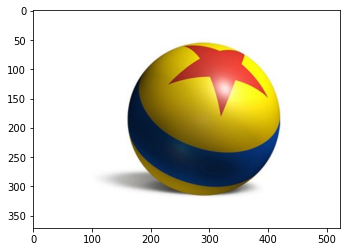

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Take an image
image = cv2.imread("/content/drive/MyDrive/Docencia/Patrones/2022-2/L14/patrones/Clase3/ball_image.jpg", 1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

print (image.shape)
plt.imshow (image)

[]

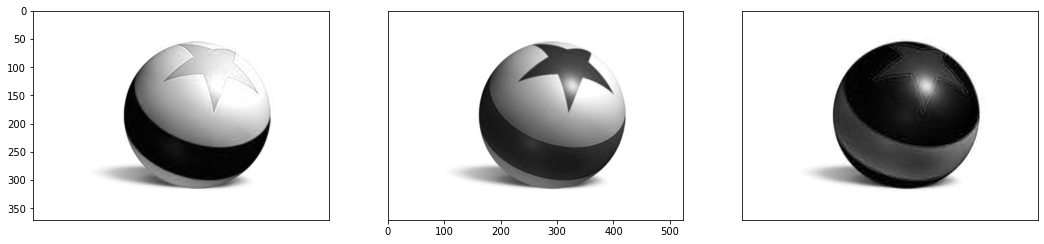

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (18,7))
axes[0].imshow(image[:,:,0], cmap = 'gray'); axes[0].set_xticks([]); #axes[0].set_yticks([])
axes[1].imshow(image[:,:,1], cmap = 'gray'); axes[1].set_yticks([]); #axes[1].set_yticks([])
axes[2].imshow(image[:,:,2], cmap = 'gray'); axes[2].set_xticks([]); axes[2].set_yticks([])
# plt.show()

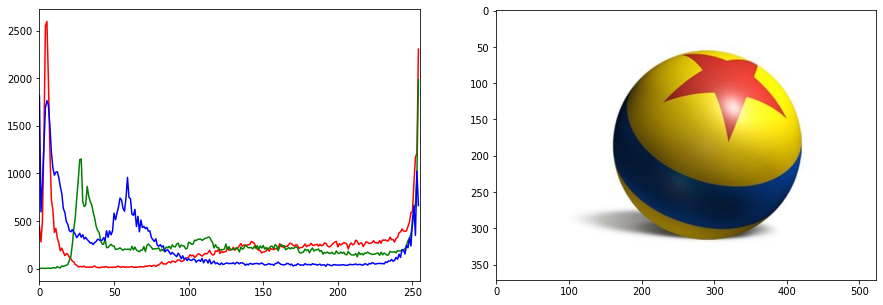

In [ ]:
image = cv2.imread("/content/drive/MyDrive/Docencia/Patrones/2022-2/L14/patrones/Clase3/ball_image.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#color = ('b','g','r')
color = ('r','g','b')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([image],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0, 255])

axes[1].imshow(image)
plt.show()

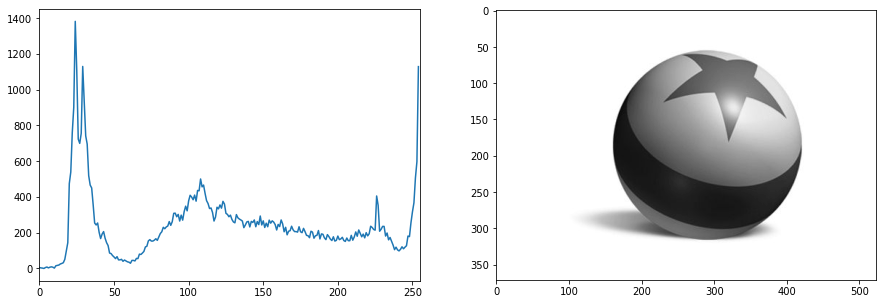

In [ ]:
image_gray = cv2.imread("/content/drive/MyDrive/Docencia/Patrones/2022-2/L14/patrones/Clase3/ball_image.jpg", 0)

fig, axes = plt.subplots (1,2, figsize = (15,5))
histr = cv2.calcHist([image_gray],[ 0 ],None,[ 255 ],[ 0 , 255 ])
axes[0].plot(histr)
axes[0].set_xlim([0,255])

axes[1].imshow( image_gray, cmap = "gray" )
#plt.show()

## Segment one zone - The star

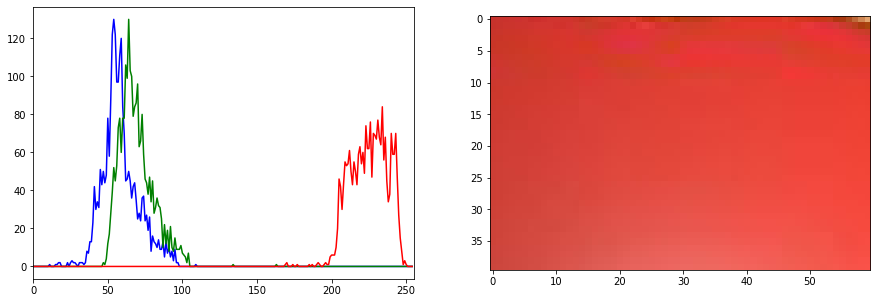

In [25]:
image = cv2.imread("/content/drive/MyDrive/Docencia/Patrones/2022-2/L14/patrones/Clase3/ball_image.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

roi = image[70:110, 290:350, :]

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ 255 ],[ 0 , 255 ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( cv2.cvtColor(roi, cv2.COLOR_BGR2RGB) )
plt.show()

In [26]:
lower_red = np.uint8([[[ 40 , 50 , 200 ]]])
upper_red = np.uint8([[[ 100, 110, 255 ]]])

In [27]:
mask = np.zeros ([image.shape[0], image.shape[1]], dtype = "uint8")

for i in range(image.shape[0]) :
  for j in range(image.shape[1]):
    if lower_red[0,0,0] < image[i,j,0] < upper_red[0,0,0] and \
       lower_red[0,0,1] < image[i,j,1] < upper_red[0,0,1] and \
       lower_red[0,0,2] < image[i,j,2] < upper_red[0,0,2] :
      mask[i,j] = 255
    else: 
      mask[i,j] = 0


In [29]:
# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
def segment_color (image, lower_color, upper_color): 
  #
  mask = np.zeros ([image.shape[0], image.shape[1]], dtype = "uint8")
  
  for i in range(image.shape[0]) :
    for j in range(image.shape[1]):
      if lower_color[0,0,0] < image[i,j,0] < upper_color[0,0,0] and \
         lower_color[0,0,1] < image[i,j,1] < upper_color[0,0,1] and \
         lower_color[0,0,2] < image[i,j,2] < upper_color[0,0,2] :
        mask[i,j] = np.int(255)
      else: 
        mask[i,j] = np.int(0)
  return mask

In [ ]:
mask = segment_color (image, lower_red, upper_red)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

[]

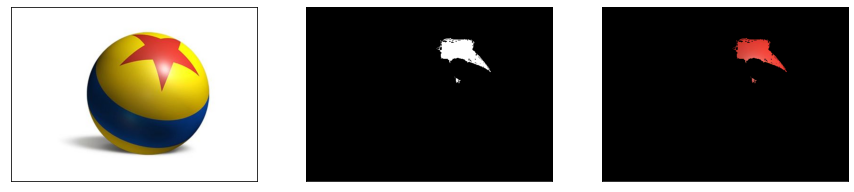

In [30]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
axes[1].imshow( mask, cmap = "gray" ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( cv2.cvtColor(res, cv2.COLOR_BGR2RGB) ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result

## Segment another zone - Blue ribbon

In [ ]:
roi = 

color = ('b','g','r')
fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( _ )
plt.show()

In [ ]:
# define range of blue color in BGR
lower_blue = np.uint8([[[ _ , _ , _ ]]])
upper_blue = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color (image, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result

# **Segmentation in HSV - More robustness**

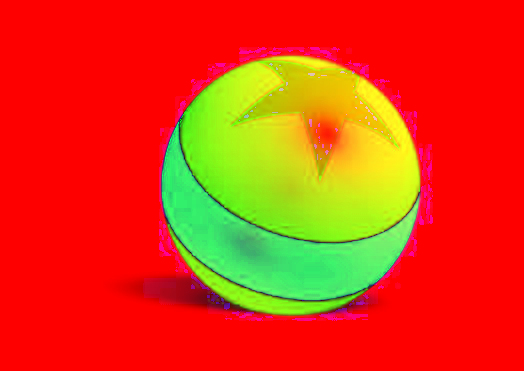

In [ ]:
# Take an image
image = 

# Convert BGR to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.imshow (image)

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow(hsv_image[:,:,0], cmap = 'gray');# axes[0].set_xticks([]); axes[0].set_yticks([])
axes[1].imshow(hsv_image[:,:,1], cmap = 'gray');# axes[1].set_xticks([]); axes[1].set_yticks([])
axes[2].imshow(hsv_image[:,:,2], cmap = 'gray');# axes[2].set_xticks([]); axes[2].set_yticks([])

In [ ]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([hsv_image],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow(hsv_image)

## Segment first zone in HSV

In [ ]:
roi = 

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow( _ )

In [ ]:
# define range of blue color in BGR
lower_red_hsv = np.uint8([[[ _ , _ , _ ]]])
upper_red_hsv = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color ( _ , _ , _ )

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image in RGB
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result in RGB

## Segment second zone in HSV

In [ ]:
roi = 

color = ('b','g','r')

fig, axes = plt.subplots (1,2, figsize = (15,5))
for i,col in enumerate(color):
    histr = cv2.calcHist([roi],[i],None,[ _ ],[ _ , _ ])
    axes[0].plot(histr,color = col)
    axes[0].set_xlim([0,255])

axes[1].imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))

In [ ]:
# define range of blue color in BGR
lower_blue_hsv = np.uint8([[[ _ , _ , _ ]]])
upper_blue_hsv = np.uint8([[[ _ , _ , _ ]]])

In [ ]:
mask = segment_color ( _ , _ , _ )

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask = mask)

In [ ]:
fig, axes = plt.subplots (1,3, figsize = (15,5))
axes[0].imshow( _ ); axes[0].set_xticks([]); axes[0].set_yticks([]) # Show image in RGB
axes[1].imshow( _ ); axes[1].set_xticks([]); axes[1].set_yticks([]) # Show mask
axes[2].imshow( _ ); axes[2].set_xticks([]); axes[2].set_yticks([]) # Show Result in RGB